## SciANN Burger 1D

In [14]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow
import sciann as sn

### Burgers problem

The governing equation is :
$$u_{,tt} - \frac{1}{\nu^2} u_{,xx} = 0, \qquad t \in [0,1], \qquad x \in [-1,1]$$
Subjected to :
$$u(t=0,x) = -\sin(\pi x), \qquad u(t,x=\pm1)=0$$
The objective is to solve this equation with PINN

### Neural Network

The independent variables are: $(t, x)$ The field variable is: $u(t, x)$

Here, we use 8 hidden layers with 20 neural units and hyperbolic-tangent activation function.

In [2]:
x = sn.Variable('x')
t = sn.Variable('t')
u = sn.Functional('u', [t,x], 8*[20], 'tanh')

### Setting up the optimization problem

In [3]:
from numpy import pi
from sciann.utils.math import diff, sign, sin

In [4]:
# For Biotite
kappa = 50.5
rho = 3050

v = (kappa/rho)**(1/2)

# From https://www.math.cuhk.edu.hk/~zou/publication/gji13long.pdf and https://www.sciencedirect.com/topics/earth-and-planetary-sciences/bulk-modulus

In [6]:
L1 = diff(u, t,order = 2) - (1/v**2)*diff(u, x, order=2)

Boundary conditions :

In [7]:
TOL = 0.001
C1 = (1-sign(t - TOL)) * (u + sin(pi*x))
C2 = (1-sign(x - (-1+TOL))) * (u)
C3 = (1+sign(x - ( 1-TOL))) * (u)

In [8]:
m = sn.SciModel([x, t], [L1, C1, C2, C3])

Sampling, collocation grid : 

To train the network, we need to define a smapling collocation grid.

In [9]:
x_data, t_data = np.meshgrid(
    np.linspace(-1, 1, 100), 
    np.linspace(0, 1, 100)
)

#### Training

In [10]:
h = m.train([x_data, t_data], 4*['zero'], learning_rate=0.002, epochs=1000, verbose=1)

Epoch 1/1000
10000/10000 [==============================] - 3s 281us/sample - loss: 1.4683 - sub_loss: 1.4265 - mul_3_loss: 0.0233 - mul_4_loss: 0.0055 - mul_5_loss: 0.0063
Epoch 2/1000
10000/10000 [==============================] - 1s 73us/sample - loss: 0.0244 - sub_loss: 0.0036 - mul_3_loss: 0.0195 - mul_4_loss: 5.0972e-04 - mul_5_loss: 6.2040e-04
Epoch 3/1000
10000/10000 [==============================] - 1s 68us/sample - loss: 0.0219 - sub_loss: 0.0019 - mul_3_loss: 0.0196 - mul_4_loss: 7.6970e-05 - mul_5_loss: 1.3054e-04
Epoch 4/1000
10000/10000 [==============================] - 1s 74us/sample - loss: 0.0210 - sub_loss: 0.0011 - mul_3_loss: 0.0197 - mul_4_loss: 4.6638e-05 - mul_5_loss: 5.7742e-05
Epoch 5/1000
10000/10000 [==============================] - 1s 69us/sample - loss: 0.0204 - sub_loss: 6.5892e-04 - mul_3_loss: 0.0196 - mul_4_loss: 3.7655e-05 - mul_5_loss: 6.5570e-05
Epoch 6/1000
10000/10000 [==============================] - 1s 67us/sample - loss: 0.0201 - sub_loss: 3

10000/10000 [==============================] - 1s 68us/sample - loss: 0.0184 - sub_loss: 5.7748e-04 - mul_3_loss: 0.0159 - mul_4_loss: 9.2349e-04 - mul_5_loss: 9.5953e-04
Epoch 46/1000
10000/10000 [==============================] - 1s 66us/sample - loss: 0.0185 - sub_loss: 5.7195e-04 - mul_3_loss: 0.0160 - mul_4_loss: 9.3358e-04 - mul_5_loss: 9.1278e-04
Epoch 47/1000
10000/10000 [==============================] - 1s 66us/sample - loss: 0.0197 - sub_loss: 7.4823e-04 - mul_3_loss: 0.0168 - mul_4_loss: 0.0010 - mul_5_loss: 9.9995e-04
Epoch 48/1000
10000/10000 [==============================] - 1s 68us/sample - loss: 0.0178 - sub_loss: 2.5807e-04 - mul_3_loss: 0.0163 - mul_4_loss: 6.3602e-04 - mul_5_loss: 6.0526e-04
Epoch 49/1000
10000/10000 [==============================] - 1s 69us/sample - loss: 0.0183 - sub_loss: 4.3763e-04 - mul_3_loss: 0.0158 - mul_4_loss: 8.1908e-04 - mul_5_loss: 0.0011
Epoch 50/1000
10000/10000 [==============================] - 1s 70us/sample - loss: 0.0188 - sub_

Epoch 89/1000
10000/10000 [==============================] - 1s 77us/sample - loss: 0.0179 - sub_loss: 3.6563e-04 - mul_3_loss: 0.0165 - mul_4_loss: 3.8974e-04 - mul_5_loss: 5.5331e-04
Epoch 90/1000
10000/10000 [==============================] - 1s 77us/sample - loss: 0.0188 - sub_loss: 0.0013 - mul_3_loss: 0.0170 - mul_4_loss: 1.9344e-04 - mul_5_loss: 1.8211e-04
Epoch 91/1000
10000/10000 [==============================] - 1s 77us/sample - loss: 0.0171 - sub_loss: 4.0781e-04 - mul_3_loss: 0.0157 - mul_4_loss: 5.4760e-04 - mul_5_loss: 4.5027e-04
Epoch 92/1000
10000/10000 [==============================] - 1s 77us/sample - loss: 0.0170 - sub_loss: 8.8818e-04 - mul_3_loss: 0.0150 - mul_4_loss: 4.7878e-04 - mul_5_loss: 6.2511e-04
Epoch 93/1000
10000/10000 [==============================] - 1s 77us/sample - loss: 0.0170 - sub_loss: 0.0010 - mul_3_loss: 0.0150 - mul_4_loss: 4.5533e-04 - mul_5_loss: 5.1275e-04
Epoch 94/1000
10000/10000 [==============================] - 1s 77us/sample - loss:

10000/10000 [==============================] - 1s 80us/sample - loss: 0.0180 - sub_loss: 0.0011 - mul_3_loss: 0.0162 - mul_4_loss: 3.1095e-04 - mul_5_loss: 3.0231e-04
Epoch 133/1000
10000/10000 [==============================] - 1s 80us/sample - loss: 0.0176 - sub_loss: 3.5955e-04 - mul_3_loss: 0.0164 - mul_4_loss: 3.5710e-04 - mul_5_loss: 3.5903e-04
Epoch 134/1000
10000/10000 [==============================] - 1s 79us/sample - loss: 0.0172 - sub_loss: 0.0011 - mul_3_loss: 0.0153 - mul_4_loss: 3.2598e-04 - mul_5_loss: 4.0255e-04
Epoch 135/1000
10000/10000 [==============================] - 1s 78us/sample - loss: 0.0167 - sub_loss: 0.0010 - mul_3_loss: 0.0147 - mul_4_loss: 4.5995e-04 - mul_5_loss: 4.6987e-04
Epoch 136/1000
10000/10000 [==============================] - 1s 78us/sample - loss: 0.0169 - sub_loss: 9.1545e-04 - mul_3_loss: 0.0152 - mul_4_loss: 2.0922e-04 - mul_5_loss: 4.8034e-04
Epoch 137/1000
10000/10000 [==============================] - 1s 79us/sample - loss: 0.0205 - sub

10000/10000 [==============================] - 1s 80us/sample - loss: 0.0168 - sub_loss: 4.4253e-04 - mul_3_loss: 0.0152 - mul_4_loss: 3.8748e-04 - mul_5_loss: 7.3664e-04
Epoch 177/1000
10000/10000 [==============================] - 1s 80us/sample - loss: 0.0163 - sub_loss: 9.6954e-04 - mul_3_loss: 0.0143 - mul_4_loss: 5.0679e-04 - mul_5_loss: 4.5072e-04
Epoch 178/1000
10000/10000 [==============================] - 1s 81us/sample - loss: 0.0167 - sub_loss: 9.1609e-04 - mul_3_loss: 0.0146 - mul_4_loss: 6.0184e-04 - mul_5_loss: 5.1078e-04
Epoch 179/1000
10000/10000 [==============================] - 1s 80us/sample - loss: 0.0167 - sub_loss: 7.4646e-04 - mul_3_loss: 0.0150 - mul_4_loss: 3.7824e-04 - mul_5_loss: 4.4257e-04
Epoch 180/1000
10000/10000 [==============================] - 1s 81us/sample - loss: 0.0175 - sub_loss: 0.0011 - mul_3_loss: 0.0156 - mul_4_loss: 2.5794e-04 - mul_5_loss: 4.1916e-04
Epoch 181/1000
10000/10000 [==============================] - 1s 81us/sample - loss: 0.01

10000/10000 [==============================] - 1s 92us/sample - loss: 0.0172 - sub_loss: 4.5955e-04 - mul_3_loss: 0.0160 - mul_4_loss: 3.4468e-04 - mul_5_loss: 3.8331e-04
Epoch 220/1000
10000/10000 [==============================] - 1s 100us/sample - loss: 0.0164 - sub_loss: 0.0011 - mul_3_loss: 0.0141 - mul_4_loss: 6.4583e-04 - mul_5_loss: 4.2074e-04
Epoch 221/1000
10000/10000 [==============================] - 1s 90us/sample - loss: 0.0179 - sub_loss: 0.0010 - mul_3_loss: 0.0160 - mul_4_loss: 3.7205e-04 - mul_5_loss: 3.6215e-04
Epoch 222/1000
10000/10000 [==============================] - 1s 89us/sample - loss: 0.0171 - sub_loss: 6.1507e-04 - mul_3_loss: 0.0157 - mul_4_loss: 3.3761e-04 - mul_5_loss: 3.2615e-04
Epoch 223/1000
10000/10000 [==============================] - 1s 111us/sample - loss: 0.0172 - sub_loss: 9.2209e-04 - mul_3_loss: 0.0156 - mul_4_loss: 3.5428e-04 - mul_5_loss: 2.7928e-04
Epoch 224/1000
10000/10000 [==============================] - 1s 85us/sample - loss: 0.0160

10000/10000 [==============================] - 1s 81us/sample - loss: 0.0180 - sub_loss: 6.5730e-04 - mul_3_loss: 0.0163 - mul_4_loss: 5.1301e-04 - mul_5_loss: 3.9559e-04
Epoch 264/1000
10000/10000 [==============================] - 1s 81us/sample - loss: 0.0176 - sub_loss: 0.0015 - mul_3_loss: 0.0154 - mul_4_loss: 3.1560e-04 - mul_5_loss: 3.1801e-04
Epoch 265/1000
10000/10000 [==============================] - 1s 82us/sample - loss: 0.0167 - sub_loss: 6.3045e-04 - mul_3_loss: 0.0150 - mul_4_loss: 4.8773e-04 - mul_5_loss: 4.6989e-04
Epoch 266/1000
10000/10000 [==============================] - 1s 83us/sample - loss: 0.0170 - sub_loss: 0.0010 - mul_3_loss: 0.0149 - mul_4_loss: 4.5777e-04 - mul_5_loss: 4.7260e-04
Epoch 267/1000
10000/10000 [==============================] - 1s 81us/sample - loss: 0.0153 - sub_loss: 0.0011 - mul_3_loss: 0.0129 - mul_4_loss: 5.6941e-04 - mul_5_loss: 6.2090e-04
Epoch 268/1000
10000/10000 [==============================] - 1s 80us/sample - loss: 0.0155 - sub

10000/10000 [==============================] - 1s 86us/sample - loss: 0.0163 - sub_loss: 6.1976e-04 - mul_3_loss: 0.0149 - mul_4_loss: 4.1471e-04 - mul_5_loss: 5.4057e-04
Epoch 308/1000
10000/10000 [==============================] - 1s 85us/sample - loss: 0.0159 - sub_loss: 0.0012 - mul_3_loss: 0.0134 - mul_4_loss: 4.7419e-04 - mul_5_loss: 6.7390e-04
Epoch 309/1000
10000/10000 [==============================] - 1s 88us/sample - loss: 0.0159 - sub_loss: 0.0011 - mul_3_loss: 0.0136 - mul_4_loss: 5.9721e-04 - mul_5_loss: 6.0888e-04
Epoch 310/1000
10000/10000 [==============================] - 1s 92us/sample - loss: 0.0193 - sub_loss: 0.0012 - mul_3_loss: 0.0178 - mul_4_loss: 1.4513e-04 - mul_5_loss: 1.7564e-04
Epoch 311/1000
10000/10000 [==============================] - 1s 89us/sample - loss: 0.0164 - sub_loss: 0.0010 - mul_3_loss: 0.0154 - mul_4_loss: 3.9793e-04 - mul_5_loss: 3.9286e-04
Epoch 312/1000
10000/10000 [==============================] - 1s 85us/sample - loss: 0.0158 - sub_los

10000/10000 [==============================] - 1s 93us/sample - loss: 0.0147 - sub_loss: 9.3527e-04 - mul_3_loss: 0.0126 - mul_4_loss: 5.7143e-04 - mul_5_loss: 5.8010e-04
Epoch 352/1000
10000/10000 [==============================] - 1s 91us/sample - loss: 0.0162 - sub_loss: 0.0016 - mul_3_loss: 0.0133 - mul_4_loss: 7.3785e-04 - mul_5_loss: 6.1357e-04
Epoch 353/1000
10000/10000 [==============================] - 1s 92us/sample - loss: 0.0148 - sub_loss: 7.6856e-04 - mul_3_loss: 0.0127 - mul_4_loss: 7.7135e-04 - mul_5_loss: 5.2085e-04
Epoch 354/1000
10000/10000 [==============================] - 1s 86us/sample - loss: 0.0166 - sub_loss: 0.0023 - mul_3_loss: 0.0129 - mul_4_loss: 6.2102e-04 - mul_5_loss: 7.0518e-04
Epoch 355/1000
10000/10000 [==============================] - 1s 83us/sample - loss: 0.0180 - sub_loss: 4.8589e-04 - mul_3_loss: 0.0168 - mul_4_loss: 3.4634e-04 - mul_5_loss: 3.0939e-04
Epoch 356/1000
10000/10000 [==============================] - 1s 83us/sample - loss: 0.0156 -

10000/10000 [==============================] - 1s 83us/sample - loss: 0.0139 - sub_loss: 0.0013 - mul_3_loss: 0.0108 - mul_4_loss: 7.5656e-04 - mul_5_loss: 9.3906e-04
Epoch 394/1000
10000/10000 [==============================] - 1s 88us/sample - loss: 0.0131 - sub_loss: 5.6664e-04 - mul_3_loss: 0.0106 - mul_4_loss: 8.4413e-04 - mul_5_loss: 9.4586e-04
Epoch 395/1000
10000/10000 [==============================] - 1s 84us/sample - loss: 0.0149 - sub_loss: 0.0021 - mul_3_loss: 0.0114 - mul_4_loss: 7.7060e-04 - mul_5_loss: 6.3768e-04
Epoch 396/1000
10000/10000 [==============================] - 1s 84us/sample - loss: 0.0130 - sub_loss: 4.4007e-04 - mul_3_loss: 0.0109 - mul_4_loss: 7.6610e-04 - mul_5_loss: 8.5149e-04
Epoch 397/1000
10000/10000 [==============================] - 1s 83us/sample - loss: 0.0130 - sub_loss: 8.0135e-04 - mul_3_loss: 0.0099 - mul_4_loss: 0.0012 - mul_5_loss: 9.6131e-04
Epoch 398/1000
10000/10000 [==============================] - 1s 84us/sample - loss: 0.0134 - sub

10000/10000 [==============================] - 1s 84us/sample - loss: 0.0125 - sub_loss: 7.6324e-04 - mul_3_loss: 0.0097 - mul_4_loss: 0.0011 - mul_5_loss: 9.3609e-04
Epoch 438/1000
10000/10000 [==============================] - 1s 82us/sample - loss: 0.0131 - sub_loss: 0.0014 - mul_3_loss: 0.0102 - mul_4_loss: 9.8518e-04 - mul_5_loss: 9.7414e-04
Epoch 439/1000
10000/10000 [==============================] - 1s 86us/sample - loss: 0.0129 - sub_loss: 8.6298e-04 - mul_3_loss: 0.0101 - mul_4_loss: 9.5338e-04 - mul_5_loss: 8.6166e-04
Epoch 440/1000
10000/10000 [==============================] - 1s 84us/sample - loss: 0.0130 - sub_loss: 0.0013 - mul_3_loss: 0.0099 - mul_4_loss: 8.5182e-04 - mul_5_loss: 8.9157e-04
Epoch 441/1000
10000/10000 [==============================] - 1s 85us/sample - loss: 0.0122 - sub_loss: 6.5746e-04 - mul_3_loss: 0.0095 - mul_4_loss: 0.0011 - mul_5_loss: 9.7077e-04
Epoch 442/1000
10000/10000 [==============================] - 1s 83us/sample - loss: 0.0121 - sub_los

10000/10000 [==============================] - 1s 83us/sample - loss: 0.0122 - sub_loss: 8.1372e-04 - mul_3_loss: 0.0098 - mul_4_loss: 0.0011 - mul_5_loss: 9.3989e-04
Epoch 483/1000
10000/10000 [==============================] - 1s 82us/sample - loss: 0.0137 - sub_loss: 0.0019 - mul_3_loss: 0.0103 - mul_4_loss: 7.3837e-04 - mul_5_loss: 9.1071e-04
Epoch 484/1000
10000/10000 [==============================] - 1s 89us/sample - loss: 0.0133 - sub_loss: 0.0015 - mul_3_loss: 0.0101 - mul_4_loss: 8.8150e-04 - mul_5_loss: 7.2655e-04
Epoch 485/1000
10000/10000 [==============================] - 1s 83us/sample - loss: 0.0132 - sub_loss: 0.0014 - mul_3_loss: 0.0108 - mul_4_loss: 7.4739e-04 - mul_5_loss: 7.1215e-04
Epoch 486/1000
10000/10000 [==============================] - 1s 81us/sample - loss: 0.0136 - sub_loss: 0.0024 - mul_3_loss: 0.0093 - mul_4_loss: 8.5757e-04 - mul_5_loss: 0.0010
Epoch 487/1000
10000/10000 [==============================] - 1s 81us/sample - loss: 0.0137 - sub_loss: 0.001

10000/10000 [==============================] - 1s 83us/sample - loss: 0.0144 - sub_loss: 0.0022 - mul_3_loss: 0.0109 - mul_4_loss: 5.7440e-04 - mul_5_loss: 7.0248e-04
Epoch 528/1000
10000/10000 [==============================] - 1s 83us/sample - loss: 0.0149 - sub_loss: 0.0034 - mul_3_loss: 0.0097 - mul_4_loss: 7.8174e-04 - mul_5_loss: 8.8742e-04
Epoch 529/1000
10000/10000 [==============================] - 1s 83us/sample - loss: 0.0148 - sub_loss: 5.9042e-04 - mul_3_loss: 0.0132 - mul_4_loss: 4.1093e-04 - mul_5_loss: 4.8093e-04
Epoch 530/1000
10000/10000 [==============================] - 1s 83us/sample - loss: 0.0125 - sub_loss: 7.6474e-04 - mul_3_loss: 0.0100 - mul_4_loss: 8.3482e-04 - mul_5_loss: 8.7221e-04
Epoch 531/1000
10000/10000 [==============================] - 1s 82us/sample - loss: 0.0133 - sub_loss: 0.0015 - mul_3_loss: 0.0102 - mul_4_loss: 8.0876e-04 - mul_5_loss: 7.5357e-04
Epoch 532/1000
10000/10000 [==============================] - 1s 83us/sample - loss: 0.0129 - sub

10000/10000 [==============================] - 1s 83us/sample - loss: 0.0129 - sub_loss: 0.0017 - mul_3_loss: 0.0098 - mul_4_loss: 8.6310e-04 - mul_5_loss: 9.8249e-04
Epoch 572/1000
10000/10000 [==============================] - 1s 82us/sample - loss: 0.0125 - sub_loss: 0.0012 - mul_3_loss: 0.0096 - mul_4_loss: 9.0712e-04 - mul_5_loss: 0.0010
Epoch 573/1000
10000/10000 [==============================] - 1s 83us/sample - loss: 0.0122 - sub_loss: 0.0011 - mul_3_loss: 0.0091 - mul_4_loss: 9.8756e-04 - mul_5_loss: 9.9833e-04
Epoch 574/1000
10000/10000 [==============================] - 1s 83us/sample - loss: 0.0124 - sub_loss: 0.0014 - mul_3_loss: 0.0092 - mul_4_loss: 9.6130e-04 - mul_5_loss: 8.0995e-04
Epoch 575/1000
10000/10000 [==============================] - 1s 83us/sample - loss: 0.0127 - sub_loss: 0.0014 - mul_3_loss: 0.0095 - mul_4_loss: 8.3528e-04 - mul_5_loss: 9.0729e-04
Epoch 576/1000
10000/10000 [==============================] - 1s 82us/sample - loss: 0.0135 - sub_loss: 0.001

10000/10000 [==============================] - 1s 82us/sample - loss: 0.0123 - sub_loss: 8.0808e-04 - mul_3_loss: 0.0098 - mul_4_loss: 7.8813e-04 - mul_5_loss: 8.0560e-04
Epoch 617/1000
10000/10000 [==============================] - 1s 83us/sample - loss: 0.0121 - sub_loss: 0.0013 - mul_3_loss: 0.0086 - mul_4_loss: 0.0010 - mul_5_loss: 0.0011
Epoch 618/1000
10000/10000 [==============================] - 1s 82us/sample - loss: 0.0156 - sub_loss: 0.0034 - mul_3_loss: 0.0108 - mul_4_loss: 6.1864e-04 - mul_5_loss: 7.1638e-04
Epoch 619/1000
10000/10000 [==============================] - 1s 82us/sample - loss: 0.0138 - sub_loss: 8.7209e-04 - mul_3_loss: 0.0119 - mul_4_loss: 6.1650e-04 - mul_5_loss: 3.9746e-04
Epoch 620/1000
10000/10000 [==============================] - 1s 82us/sample - loss: 0.0125 - sub_loss: 0.0015 - mul_3_loss: 0.0095 - mul_4_loss: 7.2503e-04 - mul_5_loss: 8.0934e-04
Epoch 621/1000
10000/10000 [==============================] - 1s 82us/sample - loss: 0.0126 - sub_loss: 9

10000/10000 [==============================] - 1s 83us/sample - loss: 0.0126 - sub_loss: 0.0012 - mul_3_loss: 0.0097 - mul_4_loss: 0.0010 - mul_5_loss: 6.4532e-04
Epoch 662/1000
10000/10000 [==============================] - 1s 84us/sample - loss: 0.0186 - sub_loss: 0.0029 - mul_3_loss: 0.0149 - mul_4_loss: 2.7533e-04 - mul_5_loss: 4.6719e-04
Epoch 663/1000
10000/10000 [==============================] - 1s 84us/sample - loss: 0.0126 - sub_loss: 9.5381e-04 - mul_3_loss: 0.0099 - mul_4_loss: 0.0010 - mul_5_loss: 8.8617e-04
Epoch 664/1000
10000/10000 [==============================] - 1s 83us/sample - loss: 0.0134 - sub_loss: 0.0014 - mul_3_loss: 0.0105 - mul_4_loss: 6.7085e-04 - mul_5_loss: 7.7789e-04
Epoch 665/1000
10000/10000 [==============================] - 1s 83us/sample - loss: 0.0121 - sub_loss: 0.0011 - mul_3_loss: 0.0099 - mul_4_loss: 9.6629e-04 - mul_5_loss: 8.3538e-04
Epoch 666/1000
10000/10000 [==============================] - 1s 95us/sample - loss: 0.0124 - sub_loss: 0.001

10000/10000 [==============================] - 1s 74us/sample - loss: 0.0127 - sub_loss: 0.0013 - mul_3_loss: 0.0094 - mul_4_loss: 9.1528e-04 - mul_5_loss: 0.0012
Epoch 706/1000
10000/10000 [==============================] - 1s 80us/sample - loss: 0.0124 - sub_loss: 0.0011 - mul_3_loss: 0.0095 - mul_4_loss: 8.8575e-04 - mul_5_loss: 8.4114e-04
Epoch 707/1000
10000/10000 [==============================] - 1s 93us/sample - loss: 0.0115 - sub_loss: 6.2680e-04 - mul_3_loss: 0.0092 - mul_4_loss: 9.3328e-04 - mul_5_loss: 8.1280e-04
Epoch 708/1000
10000/10000 [==============================] - 1s 79us/sample - loss: 0.0123 - sub_loss: 0.0016 - mul_3_loss: 0.0090 - mul_4_loss: 9.7668e-04 - mul_5_loss: 9.5867e-04
Epoch 709/1000
10000/10000 [==============================] - 1s 80us/sample - loss: 0.0116 - sub_loss: 9.2583e-04 - mul_3_loss: 0.0087 - mul_4_loss: 0.0011 - mul_5_loss: 8.7205e-04
Epoch 710/1000
10000/10000 [==============================] - 1s 73us/sample - loss: 0.0123 - sub_loss: 0

10000/10000 [==============================] - 1s 66us/sample - loss: 0.0107 - sub_loss: 7.8518e-04 - mul_3_loss: 0.0077 - mul_4_loss: 0.0011 - mul_5_loss: 0.0011
Epoch 750/1000
10000/10000 [==============================] - 1s 66us/sample - loss: 0.0102 - sub_loss: 4.4652e-04 - mul_3_loss: 0.0075 - mul_4_loss: 0.0011 - mul_5_loss: 0.0011
Epoch 751/1000
10000/10000 [==============================] - 1s 66us/sample - loss: 0.0101 - sub_loss: 3.6314e-04 - mul_3_loss: 0.0073 - mul_4_loss: 0.0011 - mul_5_loss: 0.0012
Epoch 752/1000
10000/10000 [==============================] - 1s 67us/sample - loss: 0.0123 - sub_loss: 0.0024 - mul_3_loss: 0.0078 - mul_4_loss: 0.0013 - mul_5_loss: 0.0010
Epoch 753/1000
10000/10000 [==============================] - 1s 67us/sample - loss: 0.0107 - sub_loss: 6.2118e-04 - mul_3_loss: 0.0082 - mul_4_loss: 9.5593e-04 - mul_5_loss: 8.7480e-04
Epoch 754/1000
10000/10000 [==============================] - 1s 67us/sample - loss: 0.0102 - sub_loss: 4.8508e-04 - mul_

10000/10000 [==============================] - 1s 66us/sample - loss: 0.0103 - sub_loss: 0.0011 - mul_3_loss: 0.0068 - mul_4_loss: 0.0011 - mul_5_loss: 0.0012
Epoch 795/1000
10000/10000 [==============================] - 1s 66us/sample - loss: 0.0097 - sub_loss: 3.9861e-04 - mul_3_loss: 0.0069 - mul_4_loss: 0.0012 - mul_5_loss: 0.0011
Epoch 796/1000
10000/10000 [==============================] - 1s 67us/sample - loss: 0.0108 - sub_loss: 0.0017 - mul_3_loss: 0.0069 - mul_4_loss: 0.0010 - mul_5_loss: 0.0011 
Epoch 797/1000
10000/10000 [==============================] - 1s 66us/sample - loss: 0.0100 - sub_loss: 7.3899e-04 - mul_3_loss: 0.0077 - mul_4_loss: 0.0010 - mul_5_loss: 9.3252e-04
Epoch 798/1000
10000/10000 [==============================] - 1s 67us/sample - loss: 0.0099 - sub_loss: 8.3581e-04 - mul_3_loss: 0.0069 - mul_4_loss: 0.0011 - mul_5_loss: 0.0010 
Epoch 799/1000
10000/10000 [==============================] - 1s 67us/sample - loss: 0.0155 - sub_loss: 0.0046 - mul_3_loss: 0.

10000/10000 [==============================] - 1s 67us/sample - loss: 0.0108 - sub_loss: 0.0018 - mul_3_loss: 0.0069 - mul_4_loss: 0.0011 - mul_5_loss: 9.6571e-04
Epoch 840/1000
10000/10000 [==============================] - 1s 67us/sample - loss: 0.0095 - sub_loss: 6.3734e-04 - mul_3_loss: 0.0069 - mul_4_loss: 0.0011 - mul_5_loss: 0.0010 
Epoch 841/1000
10000/10000 [==============================] - 1s 66us/sample - loss: 0.0095 - sub_loss: 7.2474e-04 - mul_3_loss: 0.0069 - mul_4_loss: 0.0011 - mul_5_loss: 9.8113e-04
Epoch 842/1000
10000/10000 [==============================] - 1s 67us/sample - loss: 0.0153 - sub_loss: 0.0044 - mul_3_loss: 0.0095 - mul_4_loss: 6.1949e-04 - mul_5_loss: 6.4500e-04
Epoch 843/1000
10000/10000 [==============================] - 1s 66us/sample - loss: 0.0098 - sub_loss: 4.8665e-04 - mul_3_loss: 0.0076 - mul_4_loss: 8.9028e-04 - mul_5_loss: 7.3080e-04
Epoch 844/1000
10000/10000 [==============================] - 1s 67us/sample - loss: 0.0109 - sub_loss: 0.00

10000/10000 [==============================] - 1s 67us/sample - loss: 0.0092 - sub_loss: 8.9534e-04 - mul_3_loss: 0.0062 - mul_4_loss: 0.0012 - mul_5_loss: 8.3149e-04
Epoch 885/1000
10000/10000 [==============================] - 1s 66us/sample - loss: 0.0090 - sub_loss: 5.6874e-04 - mul_3_loss: 0.0060 - mul_4_loss: 0.0011 - mul_5_loss: 0.0012
Epoch 886/1000
10000/10000 [==============================] - 1s 67us/sample - loss: 0.0103 - sub_loss: 0.0019 - mul_3_loss: 0.0062 - mul_4_loss: 0.0011 - mul_5_loss: 0.0011 
Epoch 887/1000
10000/10000 [==============================] - 1s 67us/sample - loss: 0.0110 - sub_loss: 0.0019 - mul_3_loss: 0.0074 - mul_4_loss: 7.9613e-04 - mul_5_loss: 8.6058e-04
Epoch 888/1000
10000/10000 [==============================] - 1s 67us/sample - loss: 0.0095 - sub_loss: 9.1675e-04 - mul_3_loss: 0.0067 - mul_4_loss: 9.6131e-04 - mul_5_loss: 8.8264e-04
Epoch 889/1000
10000/10000 [==============================] - 1s 67us/sample - loss: 0.0094 - sub_loss: 9.6813e-

10000/10000 [==============================] - 1s 66us/sample - loss: 0.0103 - sub_loss: 0.0018 - mul_3_loss: 0.0066 - mul_4_loss: 0.0010 - mul_5_loss: 9.2128e-04
Epoch 930/1000
10000/10000 [==============================] - 1s 66us/sample - loss: 0.0101 - sub_loss: 0.0017 - mul_3_loss: 0.0064 - mul_4_loss: 0.0011 - mul_5_loss: 9.6755e-04
Epoch 931/1000
10000/10000 [==============================] - 1s 67us/sample - loss: 0.0104 - sub_loss: 0.0015 - mul_3_loss: 0.0070 - mul_4_loss: 9.4542e-04 - mul_5_loss: 9.4357e-04
Epoch 932/1000
10000/10000 [==============================] - 1s 66us/sample - loss: 0.0109 - sub_loss: 0.0023 - mul_3_loss: 0.0067 - mul_4_loss: 9.6726e-04 - mul_5_loss: 9.0293e-04
Epoch 933/1000
10000/10000 [==============================] - 1s 67us/sample - loss: 0.0102 - sub_loss: 0.0012 - mul_3_loss: 0.0073 - mul_4_loss: 9.1788e-04 - mul_5_loss: 7.0564e-04
Epoch 934/1000
10000/10000 [==============================] - 1s 67us/sample - loss: 0.0095 - sub_loss: 9.8789e-0

10000/10000 [==============================] - 1s 67us/sample - loss: 0.0101 - sub_loss: 0.0020 - mul_3_loss: 0.0059 - mul_4_loss: 0.0012 - mul_5_loss: 0.0010
Epoch 975/1000
10000/10000 [==============================] - 1s 67us/sample - loss: 0.0093 - sub_loss: 8.7426e-04 - mul_3_loss: 0.0064 - mul_4_loss: 0.0011 - mul_5_loss: 8.9628e-04
Epoch 976/1000
10000/10000 [==============================] - 1s 66us/sample - loss: 0.0106 - sub_loss: 0.0020 - mul_3_loss: 0.0066 - mul_4_loss: 0.0010 - mul_5_loss: 9.7277e-04
Epoch 977/1000
10000/10000 [==============================] - 1s 66us/sample - loss: 0.0094 - sub_loss: 9.1278e-04 - mul_3_loss: 0.0063 - mul_4_loss: 0.0011 - mul_5_loss: 0.0010
Epoch 978/1000
10000/10000 [==============================] - 1s 66us/sample - loss: 0.0088 - sub_loss: 5.6469e-04 - mul_3_loss: 0.0063 - mul_4_loss: 9.9252e-04 - mul_5_loss: 8.8939e-04
Epoch 979/1000
10000/10000 [==============================] - 1s 67us/sample - loss: 0.0103 - sub_loss: 0.0019 - mul_

#### Testing 

Evaluating the functionals.
- Evaluation with the model :
    1. the data should be povided in the same order as it was defined in the SciModel : "m = sn.SciModel([x,t],[L1,C1,C2,C3])" 
    2. u.eval(m,[x_data,t_data'])

In [11]:
x_test, t_test = np.meshgrid(
    np.linspace(-1, 1, 200), 
    np.linspace(0, 1, 200)
)
u_pred = u.eval(m, [x_test, t_test])

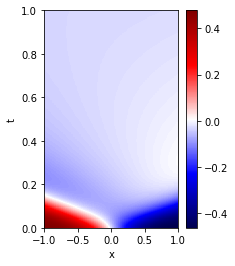

In [12]:
fig = plt.figure(figsize=(3, 4))
plt.pcolor(x_test, t_test, u_pred, cmap='seismic')
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar()

In [13]:
u_pred.shape

(200, 200)